Importing Libraries

In [60]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplcursors
import seaborn as sns
import altair as alt
import plotly.express as px

Mounting Dataset

In [61]:
akv16 = pd.read_csv("Laptop Sales dataset.csv")
akv16.head()

,Company,Product,TypeName,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,Full HD,1920,1080,...,No,Intel,2.5,Core i5,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [62]:
akv16.columns

Index(['Company', 'Product', 'TypeName', 'Ram', 'OS', 'Weight', 'Price_euros',
       'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [63]:
num_columns = len(akv16.columns)
num_columns

22

Data Preprocessing

In [64]:
akv16.drop(['SecondaryStorage','SecondaryStorageType','Product'], axis=1, inplace=True)
akv16.head()

,Company,TypeName,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,PrimaryStorageType,GPU_company,GPU_model
0,Apple,Ultrabook,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,SSD,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,Flash Storage,Intel,HD Graphics 6000
2,HP,Notebook,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5,256,SSD,Intel,HD Graphics 620
3,Apple,Ultrabook,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,SSD,AMD,Radeon Pro 455
4,Apple,Ultrabook,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,SSD,Intel,Iris Plus Graphics 650


In [65]:
akv16.rename(columns={'Price_euros':'Price','Ram':'RAM'}, inplace=True)

In [66]:
num_columns = len(akv16.columns)
print(num_columns)
akv16.shape

19


(1275, 19)

In [67]:
akv16.isnull().sum()

Company               0
TypeName              0
RAM                   0
OS                    0
Weight                0
Price                 0
Screen                0
ScreenW               0
ScreenH               0
Touchscreen           0
IPSpanel              0
RetinaDisplay         0
CPU_company           0
CPU_freq              0
CPU_model             0
PrimaryStorage        0
PrimaryStorageType    0
GPU_company           0
GPU_model             0
dtype: int64

In [68]:
def remove_outliers_iqr(akv16, column):
    Q1 = akv16[column].quantile(0.25)
    Q3 = akv16[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned = akv16[(akv16[column] >= lower_bound) & (akv16[column] <= upper_bound)]
    return df_cleaned

akv16 = remove_outliers_iqr(akv16, 'Price')
akv16 = remove_outliers_iqr(akv16, 'Weight')
print(akv16.shape)

(1213, 19)


Data Visualization

1) Distribution of Laptop Brands


In [69]:

brand_counts = akv16['Company'].value_counts().reset_index()
brand_counts.columns = ['Company', 'Count']

bar_chart_brands = alt.Chart(brand_counts).mark_bar().encode(
    x=alt.X('Company:N', sort='-y', title='Laptop Brands'),  
    y=alt.Y('Count:Q', title='Number of Laptops'),
    color='Company:N', 
    tooltip=['Company:N', 'Count:Q'],
).properties(
    title='Distribution of Laptop Brands',
    width=300,
    height=200,
).interactive()

alt.themes.enable('dark')  

bar_chart_brands.save('1.html')
bar_chart_brands



alt.Chart(...)

2) Total Price by Storage Type and Company

In [96]:
# Grouping the data by 'PrimaryStorageType' and 'Company', then summing the prices
area_data = akv16.groupby(['PrimaryStorageType', 'Company'], as_index=False)['Price'].sum()


area_plot = alt.Chart(area_data).mark_rect(opacity=0.5).encode(
    x=alt.X('PrimaryStorageType:O', title='Storage Type'),
    y=alt.Y('Price:Q', title='Total Price'),
    color='Company:N',  # Color encoding for different companies
    tooltip=['Company:N', 'PrimaryStorageType:O', 'Price:Q']  # Tooltips for interaction
).properties(
    title='Total Price by Storage Type and Company',
    width=300,
    height=200,
).interactive()
alt.themes.enable('dark')  

# Display the area plot
area_plot.save('2.html')
area_plot

alt.Chart(...)

Laptop Price vs RAM Size (Top Companies)

In [71]:
# Reduce the number of companies for clarity
top_companies = akv16['Company'].value_counts().nlargest(5).index
filtered_data = akv16[akv16['Company'].isin(top_companies)]

# Create a selection for companies
company_selection = alt.selection_point(fields=['Company'], bind='legend')

# Create the scatter plot with selection
scatter_plot = alt.Chart(filtered_data).mark_circle(size=100, opacity=0.7).encode(
    x=alt.X('RAM', title='RAM (GB)'),
    y=alt.Y('Price:Q', title='Price'),
    color=alt.condition(company_selection, 'Company:N', alt.value('lightgray')),  # Grey out unselected companies
    tooltip=['Company', 'RAM', 'Price']
).properties(
    title='Laptop Price vs RAM Size (Top Companies)',
    width=550,
    height=250
).add_params(company_selection)

scatter_plot = scatter_plot.interactive()

alt.themes.enable('dark') 
scatter_plot.save('3.html')
scatter_plot


alt.Chart(...)

Box Plot: Price Comparison by Laptop Type


In [72]:
import altair as alt

# Assuming akv16 is your DataFrame
# Histogram of Screen Width using area chart
histogram_screen_width = alt.Chart(akv16).mark_bar(opacity=0.6).encode(
    x=alt.X('ScreenW:Q', bin=alt.Bin(maxbins=30), title='Screen Width (Pixels)'),
    y=alt.Y('count():Q', title='Count of Laptops', scale=alt.Scale(type='log')),  # Logarithmic scale
    color=alt.Color('count():Q', scale=alt.Scale(scheme='goldred'), title='Count of Laptops'),  # Color by count
    tooltip=[
        alt.Tooltip('ScreenW:Q', title='Screen Width (Pixels)'),
        alt.Tooltip('count():Q', title='Count of Laptops')  # Show count in tooltip
    ]
).properties(
    title='Distribution of Screen Widths',
    width=500,
    height=250
).interactive()

# Display the histogram
histogram_screen_width.save('4.html')
histogram_screen_width


alt.Chart(...)

Weight Distribution by Laptop Brand

In [73]:
# Box Plot of Weight by Brand
box_plot_weight = alt.Chart(akv16).mark_boxplot().encode(
    x=alt.X('Company:N', title='Brand'),
    y=alt.Y('Weight:Q', title='Weight (Kg)'),
    color='Company'
).properties(
    title='Weight Distribution by Laptop Brand',
    width=550,
    height=230,
).interactive()
alt.themes.enable('dark') 
box_plot_weight.save('5.html')
box_plot_weight


alt.Chart(...)

Market Share of CPU Companies

In [74]:
# Generate the counts of CPU companies
cpu_counts = akv16['CPU_company'].value_counts().reset_index()
cpu_counts.columns = ['CPU_Company', 'Count']
print(cpu_counts)

# Base chart with arcs
base = alt.Chart(cpu_counts).encode(
    theta=alt.Theta("Count:Q", stack=True),
    radius=alt.Radius("Count:Q", scale=alt.Scale(type="sqrt", zero=True, rangeMin=150)),
    color=alt.Color("CPU_Company:N", scale=alt.Scale(scheme='dark2'),  legend=None),  # Using CPU_Company for color
    tooltip=['CPU_Company', 'Count']
).properties(
    title='Market Share of CPU Companies',
    width=500,
    height=210
)

# Arc chart
c1 = base.mark_arc(innerRadius=75, stroke="#fff")

# Adding the text labels with offset
c2 = base.mark_text(radiusOffset=10).encode(
    text=alt.Text("Count:Q")  # Show the Count as text labels
)

# Combine arc and text charts
c3 = c1 + c2
c3.save('6.html')
c3.interactive()


  CPU_Company  Count
0       Intel   1152
1         AMD     60
2     Samsung      1


alt.LayerChart(...)

Average Laptop Prices by Operating System

In [75]:
# Remove rows with null values in the OS column and entries with "No OS"
laptop_sales_data = akv16[(akv16['OS'] != "No OS")]

# Calculate average price by OS
average_price_os = laptop_sales_data.groupby('OS')['Price'].mean().reset_index()

# Create a bar chart to visualize average prices by OS
bar_chart_os_price = alt.Chart(average_price_os).mark_area(line={'color':'black'},color=alt.Gradient(gradient='linear',
        stops=[alt.GradientStop(color='yellow', offset=0),
               alt.GradientStop(color='red', offset=1)])).encode(
    x=alt.X('OS:N', title='Operating System'),
    y=alt.Y('Price:Q', title='Average Price'),
    tooltip=['OS', 'Price']
).properties(
    title='Average Laptop Prices by Operating System',
    width=400,
    height=190,
)
alt.themes.enable('dark')

bar_chart_os_price.save('7.html')
bar_chart_os_price


alt.Chart(...)

In [76]:
import altair as alt
import pandas as pd

# Filter data for Intel and AMD CPU companies
intel_data = akv16[akv16['CPU_company'] == 'Intel']
amd_data = akv16[akv16['CPU_company'] == 'AMD']

# Function to create a heatmap
def create_heatmap(data, title, color_title):
    return alt.Chart(data).mark_rect().encode(
        x=alt.X('CPU_model:N', title='CPU Model', sort='-y'),
        y=alt.Y('CPU_freq:Q', title='CPU Frequency (GHz)'),
        color=alt.Color('CPU_freq:Q', scale=alt.Scale(scheme='blueorange'), title=color_title),
        tooltip=['CPU_model:N', 'CPU_freq:Q', 'count():Q']
    ).properties(
        title=title,
        width=500,
        height=300
    )

# Create heatmaps for Intel and AMD
heatmap_intel = create_heatmap(intel_data, 'Heatmap of Intel CPU Frequencies', 'CPU Frequency (GHz)')
heatmap_amd = create_heatmap(amd_data, 'Heatmap of AMD CPU Frequencies', 'CPU Frequency (GHz)')

# Combine the two heatmaps side by side
side_by_side_heatmaps = alt.hconcat(heatmap_intel, heatmap_amd).resolve_scale(
    y='shared'  # Share the y-axis scale for better comparison
)

# Save the combined heatmaps to an HTML file
side_by_side_heatmaps.save('8.html')

# Display the combined heatmaps
side_by_side_heatmaps


alt.HConcatChart(...)

In [77]:

# Create the sunburst chart
fig = px.sunburst(
    laptop_sales_data,
    path=['CPU_company', 'CPU_model', 'CPU_freq'],  # Define the hierarchy
    values='Price',  # Values to aggregate (e.g., Price or Count)
    title="Sunburst Chart of CPU Company, Model, and Frequency",
    color='CPU_company',  # Color by CPU Company
    color_discrete_map={'Intel': 'blue', 'AMD': 'red','Samsung':'yellow'}  # Optional: set colors for Intel and AMD
)
fig.update_layout(
    margin=dict(l=0, r=0, t=40, b=0),  # Set margins to align the chart to the left
    title_x=0,  # Align the title to the left
    xaxis=dict(automargin=True),
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the plot itself
    paper_bgcolor='rgb(51,51,51)',  # Dark background color for the whole chart
    font_color='white',  # Set font color to white for better contrast
    title_font=dict(size=20, color='white'),
)
fig.write_html("sunburst_chart.html")
# Show the figure
fig.show()


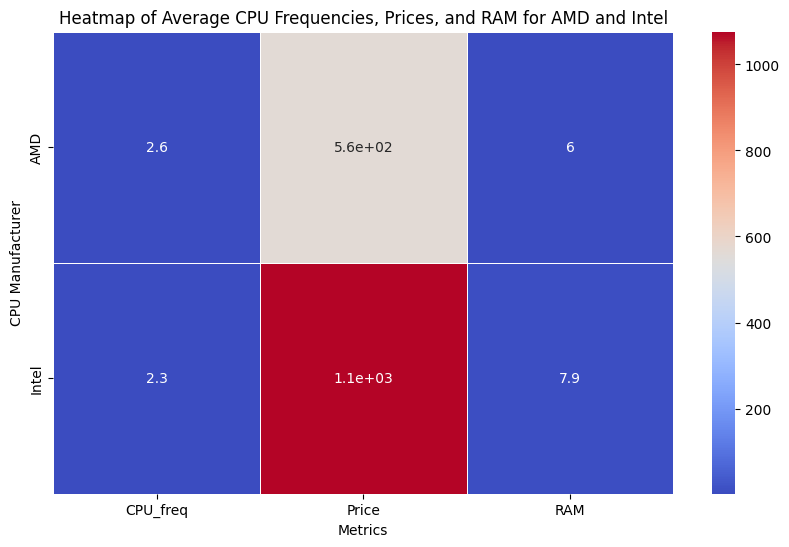

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for AMD and Intel CPUs
cpu_data = akv16[akv16['CPU_company'].isin(['AMD', 'Intel'])]

# Group by CPU company and calculate the average CPU frequency, Price, and RAM
cpu_summary = cpu_data.groupby('CPU_company').agg({
    'CPU_freq': 'mean',
    'Price': 'mean',
    'RAM': 'mean'
}).reset_index()

# Set the index to CPU company for heatmap and create a multi-index DataFrame
cpu_summary = cpu_summary.set_index('CPU_company')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cpu_summary, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Average CPU Frequencies, Prices, and RAM for AMD and Intel')
plt.xlabel('Metrics')
plt.ylabel('CPU Manufacturer')
plt.show()
